In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [2]:
# Create scene dataset
scene_data = {
    'description': [
        'Two detectives interrogating a suspect in a dimly lit room',
        'A couple walking on a beach during golden hour sunset',
        'High-speed car chase through busy city streets at night',
        'Friends having a casual conversation in a bright coffee shop',
        'A lone hero walking through a dark abandoned warehouse',
        'Family gathering around dinner table with warm lighting',
        'Intense sword fight between two warriors in a forest',
        'Business meeting in a modern glass office with city views',
        'Romantic proposal in a candlelit restaurant',
        'Superhero flying through the sky battling villain',
        'Quiet study session in a library with natural light',
        'Dance performance on a stage with colorful spotlights',
        'Hiking expedition through snowy mountain peaks',
        'Crime scene investigation with forensic team',
        'Musician performing solo in a jazz club',
        'Children playing in a park on a sunny afternoon',
        'Politician giving speech to large crowd',
        'Chef preparing gourmet meal in professional kitchen',
        'Astronaut floating in space station looking at Earth',
        'Street artist painting mural on city wall',
        'Wedding ceremony in a beautiful garden',
        'Detective examining clues with magnifying glass',
        'Athletes competing in intense basketball game',
        'Scientist conducting experiments in laboratory',
        'Horror scene with person exploring haunted house',
        'Fashion show with models on runway',
        'Documentary interview with expert in studio',
        'Action sequence with explosions and stunts',
        'Meditation scene in peaceful temple',
        'News anchor reporting from disaster zone'
    ],
    
    'scene_type': [
        'dialogue', 'romantic', 'action', 'dialogue', 'establishing',
        'dialogue', 'action', 'dialogue', 'romantic', 'action',
        'dialogue', 'performance', 'establishing', 'dialogue', 'performance',
        'establishing', 'dialogue', 'action', 'establishing', 'action',
        'romantic', 'dialogue', 'action', 'dialogue', 'action',
        'performance', 'dialogue', 'action', 'establishing', 'dialogue'
    ],
    
    'word_count': [
        11, 12, 10, 9, 10, 9, 11, 10, 8, 9,
        10, 10, 8, 7, 8, 10, 7, 8, 10, 8,
        7, 8, 8, 7, 7, 8, 7, 7, 7, 7
    ],
    
    'has_action': [
        0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0
    ],
    
    'has_dialogue': [
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 1
    ],
    
    'lighting_complexity': [
        8, 6, 9, 4, 7, 5, 7, 5, 8, 9,
        3, 9, 6, 6, 7, 5, 6, 7, 8, 6,
        7, 6, 8, 6, 9, 9, 5, 10, 4, 7
    ],
    
    'recommended_shots': [
        5, 4, 8, 3, 4, 4, 7, 4, 5, 9,
        3, 6, 5, 5, 4, 4, 4, 6, 5, 5,
        5, 4, 7, 4, 6, 7, 3, 9, 3, 5
    ]
}

df = pd.DataFrame(scene_data)

print("✅ Dataset created successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Total scenes: {len(df)}\n")
print("First 5 scenes:")
print(df.head())

✅ Dataset created successfully!

Dataset shape: (30, 7)
Total scenes: 30

First 5 scenes:
                                         description    scene_type  \
0  Two detectives interrogating a suspect in a di...      dialogue   
1  A couple walking on a beach during golden hour...      romantic   
2  High-speed car chase through busy city streets...        action   
3  Friends having a casual conversation in a brig...      dialogue   
4  A lone hero walking through a dark abandoned w...  establishing   

   word_count  has_action  has_dialogue  lighting_complexity  \
0          11           0             1                    8   
1          12           0             0                    6   
2          10           1             0                    9   
3           9           0             1                    4   
4          10           0             0                    7   

   recommended_shots  
0                  5  
1                  4  
2                  8  
3           

DATA EXPLORATION


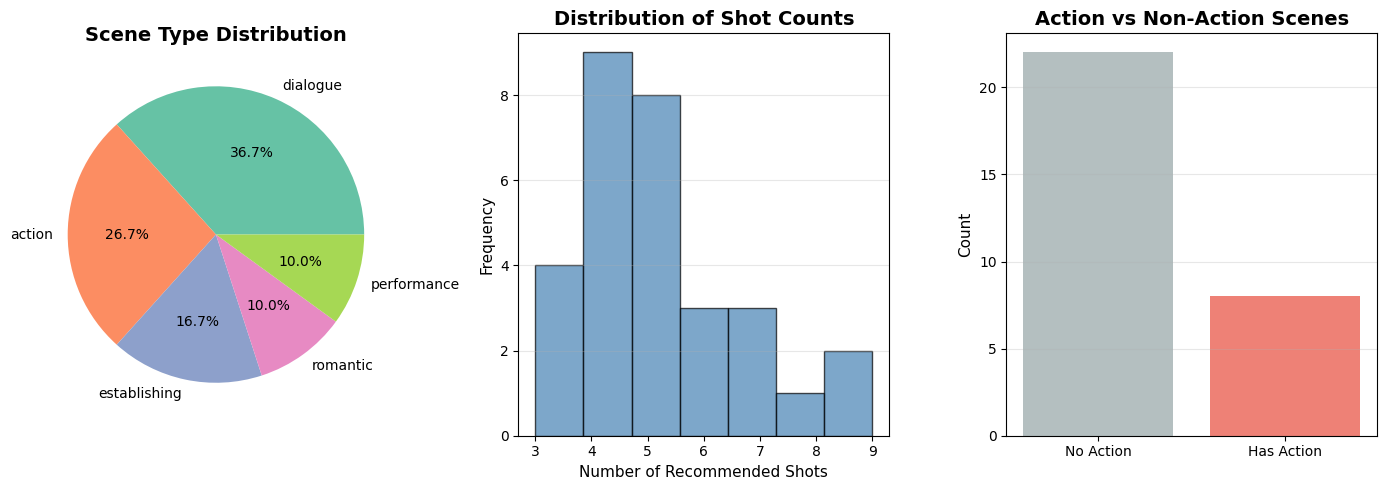


📊 Key Insights:
- Most common scene type: dialogue
- Average shots per scene: 5.1
- Scenes with action: 26.7%


In [3]:
# Visualize the data
print("="*60)
print("DATA EXPLORATION")
print("="*60)

# Scene type distribution
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
scene_counts = df['scene_type'].value_counts()
plt.pie(scene_counts.values, labels=scene_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette('Set2'))
plt.title('Scene Type Distribution', fontsize=14, fontweight='bold')

plt.subplot(1, 3, 2)
plt.hist(df['recommended_shots'], bins=7, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Recommended Shots', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Distribution of Shot Counts', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 3, 3)
action_counts = df['has_action'].value_counts()
plt.bar(['No Action', 'Has Action'], action_counts.values, 
        color=['#95a5a6', '#e74c3c'], alpha=0.7)
plt.ylabel('Count', fontsize=11)
plt.title('Action vs Non-Action Scenes', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Key Insights:")
print(f"- Most common scene type: {df['scene_type'].mode()[0]}")
print(f"- Average shots per scene: {df['recommended_shots'].mean():.1f}")
print(f"- Scenes with action: {(df['has_action'].sum() / len(df) * 100):.1f}%")

In [4]:
# Prepare data for training
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# Encode scene types
label_encoder = LabelEncoder()
df['scene_type_encoded'] = label_encoder.fit_transform(df['scene_type'])

print(f"\n✅ Label encoding complete")
print(f"   Scene types: {list(label_encoder.classes_)}")
print(f"   Encoded as: {list(range(len(label_encoder.classes_)))}")

# Show encoding
print("\nScene Type Mapping:")
for i, scene_type in enumerate(label_encoder.classes_):
    print(f"   {scene_type} → {i}")


DATA PREPROCESSING

✅ Label encoding complete
   Scene types: ['action', 'dialogue', 'establishing', 'performance', 'romantic']
   Encoded as: [0, 1, 2, 3, 4]

Scene Type Mapping:
   action → 0
   dialogue → 1
   establishing → 2
   performance → 3
   romantic → 4


In [5]:
print("\n" + "="*60)
print("TRAINING SCENE TYPE CLASSIFIER")
print("="*60)

# Prepare features and target
X_classification = df[['word_count', 'has_action', 'has_dialogue', 'lighting_complexity']]
y_classification = df['scene_type_encoded']

# Split data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

print(f"\nTraining samples: {len(X_train_clf)}")
print(f"Testing samples: {len(X_test_clf)}")

# Train model
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train_clf, y_train_clf)

# Evaluate
y_pred_clf = rf_classifier.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')

print(f"\n✅ Model Training Complete!")
print(f"   Accuracy: {accuracy:.2%}")
print(f"   F1-Score: {f1:.4f}")


TRAINING SCENE TYPE CLASSIFIER

Training samples: 24
Testing samples: 6

✅ Model Training Complete!
   Accuracy: 83.33%
   F1-Score: 0.8333



TRAINING SHOT COUNT PREDICTOR

Training samples: 24
Testing samples: 6

✅ Model Training Complete!
   Mean Squared Error: 1.4568
   R² Score: 0.6743


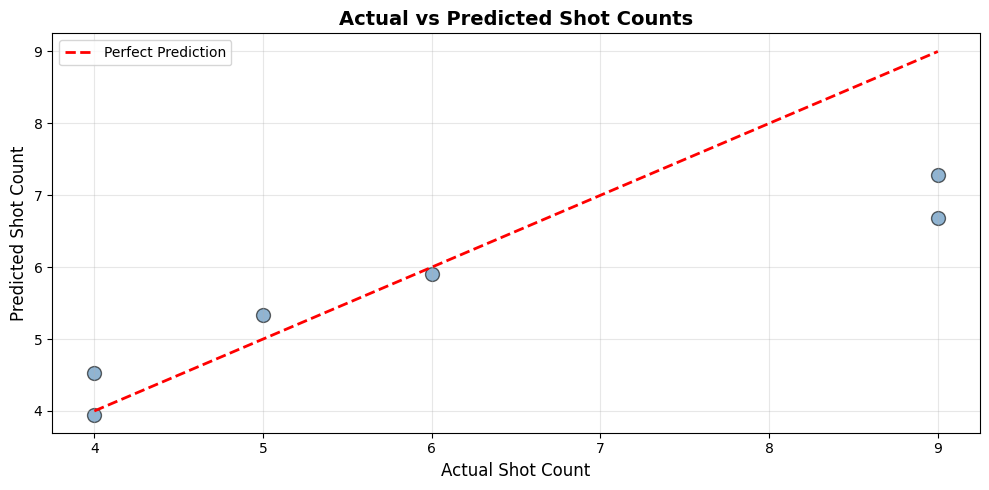

In [6]:
print("\n" + "="*60)
print("TRAINING SHOT COUNT PREDICTOR")
print("="*60)

# Prepare features and target
X_regression = df[['word_count', 'has_action', 'has_dialogue', 'lighting_complexity']]
y_regression = df['recommended_shots']

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

print(f"\nTraining samples: {len(X_train_reg)}")
print(f"Testing samples: {len(X_test_reg)}")

# Train model
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

# Evaluate
y_pred_reg = rf_regressor.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"\n✅ Model Training Complete!")
print(f"   Mean Squared Error: {mse:.4f}")
print(f"   R² Score: {r2:.4f}")

# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, s=100, color='steelblue', edgecolors='black')
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Shot Count', fontsize=12)
plt.ylabel('Predicted Shot Count', fontsize=12)
plt.title('Actual vs Predicted Shot Counts', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
print("\n" + "="*60)
print("TESTING PREDICTIONS")
print("="*60)

# Create prediction function
def analyze_scene(word_count, has_action, has_dialogue, lighting_complexity):
    features = np.array([[word_count, has_action, has_dialogue, lighting_complexity]])
    
    # Predict scene type
    scene_type_encoded = rf_classifier.predict(features)[0]
    scene_type = label_encoder.inverse_transform([scene_type_encoded])[0]
    
    # Predict shot count
    shot_count = int(round(rf_regressor.predict(features)[0]))
    
    return scene_type, shot_count

# Test examples
test_cases = [
    {"desc": "Action scene with explosions", "features": [6, 1, 0, 9]},
    {"desc": "Quiet dialogue in cafe", "features": [5, 0, 1, 4]},
    {"desc": "Romantic sunset scene", "features": [5, 0, 1, 7]}
]

for test in test_cases:
    scene_type, shots = analyze_scene(*test['features'])
    print(f"\n{test['desc']}:")
    print(f"  → Scene Type: {scene_type}")
    print(f"  → Recommended Shots: {shots}")


TESTING PREDICTIONS

Action scene with explosions:
  → Scene Type: action
  → Recommended Shots: 7

Quiet dialogue in cafe:
  → Scene Type: dialogue
  → Recommended Shots: 3

Romantic sunset scene:
  → Scene Type: dialogue
  → Recommended Shots: 5


In [8]:
print("\n" + "="*60)
print("SAVING MODELS")
print("="*60)

# Save models
joblib.dump(rf_classifier, 'scene_classifier.pkl')
joblib.dump(rf_regressor, 'shot_predictor.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("\n✅ Models saved successfully!")
print("   📁 scene_classifier.pkl")
print("   📁 shot_predictor.pkl")
print("   📁 label_encoder.pkl")
print("\n🎉 PROJECT COMPLETE!")


SAVING MODELS

✅ Models saved successfully!
   📁 scene_classifier.pkl
   📁 shot_predictor.pkl
   📁 label_encoder.pkl

🎉 PROJECT COMPLETE!
